In [1]:
import os ; import sys
sys.path.append(os.environ["DMRGROOT"])
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from dmrgpy import spinchain
N=20
def H_Ising(g, J):
    """Return energies for a system fo size N"""
    spins = ["S=1/2" for i in range(N)] # S=1/2 in each site
    sc = spinchain.Spin_Chain(spins) # create spin chain object
    h=0
    for i in range(len(spins)):
        h = h + 4*J*sc.Sz[i]*sc.Sz[(i+1)%N] + 2*g * sc.Sx[i]
         
    sc.set_hamiltonian(h)
    energy = sc.gs_energy(mode="DMRG")
    iis = range(N)
    mag_z = sum([abs(sc.vev(2*sc.Sz[i])) for i in iis])/N
    mag_x = sum([abs(sc.vev(2*sc.Sx[i])) for i in iis])/N
    return energy, mag_x, mag_z


In [3]:
n_data = 20
ratios = np.logspace(-1, 1, n_data)  # Logarithmically spaced values between 0.1 and 
ratios[int(n_data/2)] = 1
# Iterate through the ratios and compute g and J
i = 0
energies = []
mag_zs = []
mag_xs = []
for r in ratios:
    J = -1  # Keeping J constant at -1 (I hope this makes sense)
    g = r * J  # Compute g based on the ratio
    e, mag_x, mag_z = H_Ising(g, J)
    mag_zs.append(mag_z)
    mag_xs.append(mag_x)
    energies.append(e)

    print(f"i: {i}, g: {g:.4f}, J: {J:.4f}, ratio: {r:.4f}, energy: {e:.4f}, ")
    i += 1

i: 0, g: -0.1000, J: -1.0000, ratio: 0.1000, energy: -20.0500, 
i: 1, g: -0.1274, J: -1.0000, ratio: 0.1274, energy: -20.0813, 
i: 2, g: -0.1624, J: -1.0000, ratio: 0.1624, energy: -20.1320, 
i: 3, g: -0.2069, J: -1.0000, ratio: 0.2069, energy: -20.2146, 
i: 4, g: -0.2637, J: -1.0000, ratio: 0.2637, energy: -20.3491, 
i: 5, g: -0.3360, J: -1.0000, ratio: 0.3360, energy: -20.5683, 
i: 6, g: -0.4281, J: -1.0000, ratio: 0.4281, energy: -20.9269, 
i: 7, g: -0.5456, J: -1.0000, ratio: 0.5456, energy: -21.5165, 
i: 8, g: -0.6952, J: -1.0000, ratio: 0.6952, energy: -22.5005, 
i: 9, g: -0.8859, J: -1.0000, ratio: 0.8859, energy: -24.1798, 
i: 10, g: -1.0000, J: -1.0000, ratio: 1.0000, energy: -25.4910, 
i: 11, g: -1.4384, J: -1.0000, ratio: 1.4384, energy: -32.3659, 
i: 12, g: -1.8330, J: -1.0000, ratio: 1.8330, energy: -39.4424, 
i: 13, g: -2.3357, J: -1.0000, ratio: 2.3357, energy: -48.8808, 
i: 14, g: -2.9764, J: -1.0000, ratio: 2.9764, energy: -61.2191, 
i: 15, g: -3.7927, J: -1.0000, rati

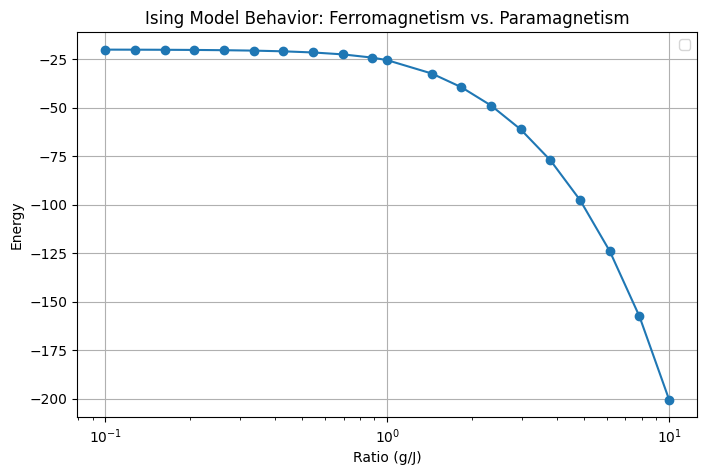

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(ratios, energies, marker='o', linestyle='-')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel("Ratio (g/J)")
plt.ylabel("Energy")
plt.title("Ising Model Behavior: Ferromagnetism vs. Paramagnetism")
plt.legend()
plt.grid(True)
plt.show()

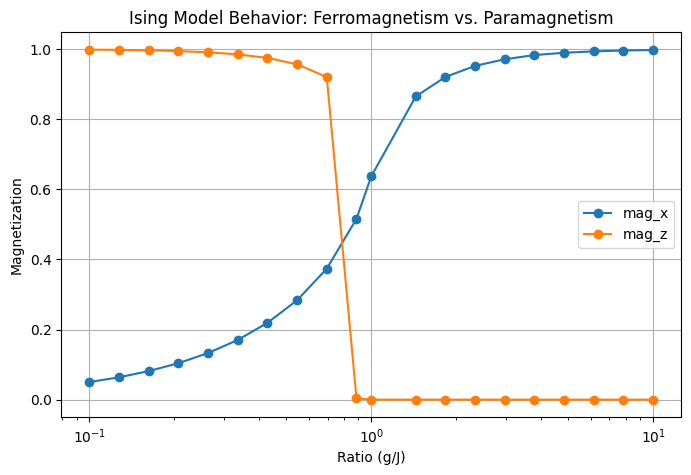

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(ratios, mag_xs, marker='o', linestyle='-', label='mag_x')
plt.plot(ratios, mag_zs, marker='o', linestyle='-', label='mag_z')
plt.xscale('log')
plt.xlabel("Ratio (g/J)")
plt.ylabel("Magnetization")
plt.title("Ising Model Behavior: Ferromagnetism vs. Paramagnetism")
plt.legend()
plt.grid(True)
plt.show()

Now calculate the correlation

In [6]:
def H_Ising_corr(g, J):
    """Return energies for a system fo size N"""
    spins = ["S=1/2" for i in range(N)] # S=1/2 in each site
    sc = spinchain.Spin_Chain(spins) # create spin chain object
    h=0
    for i in range(len(spins)):
        h = h + 4*J*sc.Sz[i]*sc.Sz[(i+1)%N] + 2*g * sc.Sx[i]
         
    sc.set_hamiltonian(h)
    #print(h.op)
    energy = sc.gs_energy(mode="DMRG")
    iis = range(N)
    corr_z = [sc.vev(sc.Sz[0] * sc.Sz[i]) for i in iis]
    corr_x = [sc.vev(sc.Sx[0] * sc.Sx[i]) for i in iis]

    return energy, corr_x, corr_z

In [7]:
n_data = 3
ratios = np.logspace(-1, 1, n_data)  # Logarithmically spaced values between 0.1 and 
ratios[int(n_data/2)] = 1
#print(ratios)
# Iterate through the ratios and compute g and J
i = 0
energies = []
corr_zs = [[], [], []]
corr_xs = [[], [], []]
for r in ratios:
    J = -1  # Keeping J constant at -1
    g = r * J  # Compute g based on the ratio
    e, corr_x, corr_z = H_Ising_corr(g, J)
    corr_zs[i] = corr_z
    corr_xs[i] = corr_x
    energies.append(e)

    print(f"i: {i}, g: {g:.4f}, J: {J:.4f}, ratio: {r:.4f}, energy: {e:.4f}, ") #magnetization: {m:4g}
    i += 1

i: 0, g: -0.1000, J: -1.0000, ratio: 0.1000, energy: -20.0500, 
i: 1, g: -1.0000, J: -1.0000, ratio: 1.0000, energy: -25.4910, 
i: 2, g: -10.0000, J: -1.0000, ratio: 10.0000, energy: -200.4753, 


In [8]:
ferro_corr_x = corr_xs[0] 
crit_corr_x = corr_xs[1]
para_corr_x = corr_xs[2]
ferro_corr_z = corr_zs[0]
crit_corr_z = corr_zs[1]
para_corr_z = corr_zs[2]

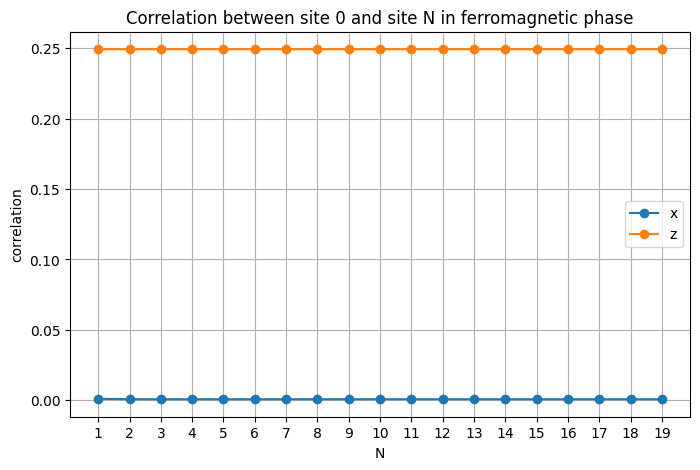

In [9]:
x = range(1, N)
plt.figure(figsize=(8, 5))
plt.plot(x, ferro_corr_x[1:], marker='o', linestyle='-', label='x')
plt.plot(x, ferro_corr_z[1:], marker='o', linestyle='-', label='z')
plt.xlabel("N")
plt.ylabel("correlation")
plt.title("Correlation between site 0 and site N in ferromagnetic phase")
plt.legend()
plt.grid(True)
plt.xticks(x)
plt.show()

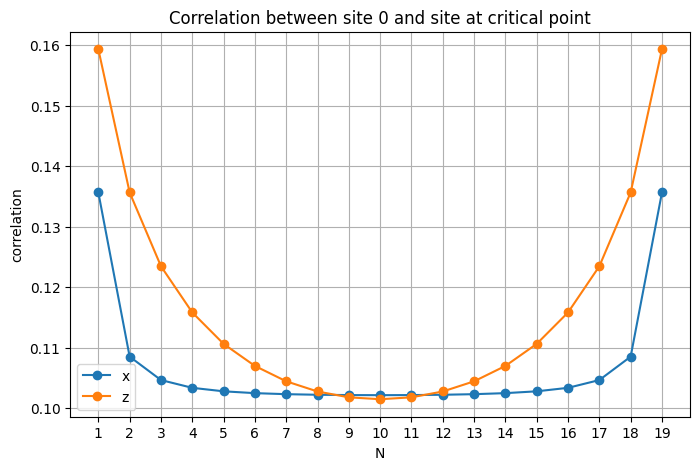

In [10]:
x = range(1, N)
plt.figure(figsize=(8, 5))
plt.plot(x, crit_corr_x[1:], marker='o', linestyle='-', label='x')
plt.plot(x, crit_corr_z[1:], marker='o', linestyle='-', label='z')
plt.xlabel("N")
plt.ylabel("correlation")
plt.title("Correlation between site 0 and site at critical point")
plt.legend()
plt.grid(True)
plt.xticks(x)
plt.show()

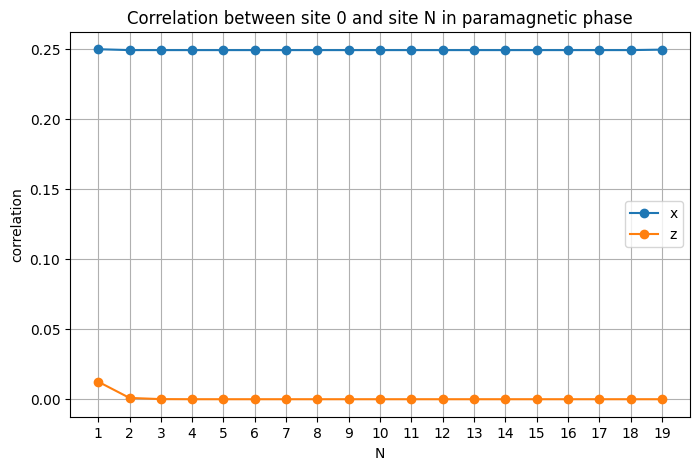

In [11]:
x = range(1, N)
plt.figure(figsize=(8, 5))
plt.plot(x, para_corr_x[1:], marker='o', linestyle='-', label='x')
plt.plot(x, para_corr_z[1:], marker='o', linestyle='-', label='z')
plt.xlabel("N")
plt.ylabel("correlation")
plt.title("Correlation between site 0 and site N in paramagnetic phase")
plt.legend()
plt.grid(True)
plt.xticks(x)
plt.show()